<center><h1> Testing new Feedforward Neural Network Architecture </h1>
John Ignacio R.M. 11 SPOOKY month 2020</center>

It is basically the same architecture as BC3, but now it is not sequential, but functional.

In [1]:
import numpy as np
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada2.model import FeedForwardNeuralNetworkArchitecture as FFNNA
from ada2.data import read_dataset, split_dataset_bymass
from ada2.plot import plot_confidence_matrix
import pandas as pd
from IPython.core.display import display, HTML
from keras.optimizers import adagrad

Using TensorFlow backend.
Welcome to JupyROOT 6.20/04


In [2]:
source_path = "../processed_data/xtohh"
masses = [1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000]
signal = "Xtohh"
bg = "Xtohh_background"
seed = 420

In [3]:
# Read xtohh dataset SR region tag 2
dfs = {mass: read_dataset(source_path, signal+str(mass), bg, "SR", 2) for mass in masses}
df = pd.concat(dfs, names = ["mass", None])
df = df.reset_index(level = 0).reset_index(drop = True)
df

,mass,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,1000,0.000457,1,498.51450,-0.536601,-2.818808,119716.39,447.70572,-1.163481,1.234735,97467.300,2.229642,2.316092,0.605876,71.701860,927.69910,419.146580
1,1000,0.000348,1,549.95325,-1.375417,1.734355,121275.48,302.23140,-1.598841,-1.238216,96785.600,2.972570,2.980955,-0.169232,84.821130,846.36835,257.105600
2,1000,0.000591,1,513.64594,0.340504,-2.402172,134068.61,362.13004,-0.013702,0.731264,100451.040,3.133436,3.153392,0.193749,81.100680,907.06665,151.556750
3,1000,0.000620,1,483.49622,-1.430659,-0.469333,111137.67,410.57037,-1.323875,2.663501,105842.830,3.132834,3.134654,0.164603,64.795180,918.62680,73.030174
4,1000,0.000562,1,456.22528,-0.444622,0.358149,165661.98,363.99133,-0.550266,-2.998335,94892.640,2.926702,2.928608,-0.206495,151.079830,853.51350,127.067240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52254,3000,0.006433,0,402.06714,0.109710,-1.277847,68576.34,486.71262,-0.060529,1.469456,120999.410,2.747302,2.752572,-0.883233,84.210686,891.92240,192.862270
52255,3000,0.004849,0,542.29900,1.579771,-2.624035,84161.26,411.07132,1.205967,0.438185,56194.777,3.062220,3.084951,-0.216563,59.169407,970.41110,136.471160
52256,3000,0.004849,0,548.63104,-0.033452,2.621298,79095.04,416.03915,0.336025,-0.553298,70408.830,3.108589,3.130470,-0.352454,34.371227,983.20233,133.526060
52257,3000,0.007816,0,683.98340,-0.029910,-0.760806,110728.80,609.47140,0.094448,2.401307,148632.220,3.121072,3.123549,0.351719,55.616740,1320.47700,75.680750


In [4]:
sets = split_dataset_bymass(df, 0.6, 0.2, 0.2, seed, masses)
sets.keys()

dict_keys(['w', 'x', 'y', 1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000])

In [5]:
x_train, x_val, x_test = sets["x"].values()
y_train, y_val, y_test = sets["y"].values()
w_train, w_val, w_test = sets["w"].values()
print(x_train.shape, x_val.shape, x_test.shape)

(31352, 15) (10453, 15) (10454, 15)


Train on 31352 samples, validate on 10453 samples
Epoch 1/50
31352/31352 [==============================] - 2s 78us/step - loss: 8.0554e-04 - val_loss: 8.3108e-04
Epoch 2/50
31352/31352 [==============================] - 2s 72us/step - loss: 7.0122e-04 - val_loss: 8.2566e-04
Epoch 3/50
31352/31352 [==============================] - 2s 73us/step - loss: 6.9163e-04 - val_loss: 8.0707e-04
Epoch 4/50
31352/31352 [==============================] - 2s 73us/step - loss: 6.7826e-04 - val_loss: 7.7932e-04
Epoch 5/50
31352/31352 [==============================] - 2s 71us/step - loss: 6.8007e-04 - val_loss: 7.7081e-04
Epoch 6/50
31352/31352 [==============================] - 2s 78us/step - loss: 6.6642e-04 - val_loss: 7.7801e-04
Epoch 7/50
31352/31352 [==============================] - 3s 88us/step - loss: 6.4712e-04 - val_loss: 7.4885e-04
Epoch 8/50
31352/31352 [==============================] - 3s 85us/step - loss: 6.5366e-04 - val_loss: 7.8092e-04
Epoch 9/50
31352/31352 [======================

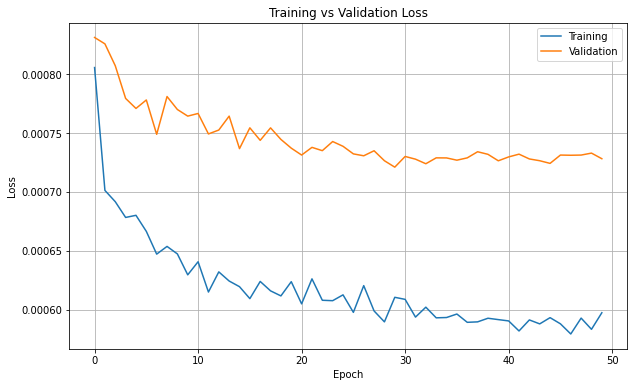

2020-10-11 16:36:57.043434: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-10-11 16:36:57.063707: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-11 16:36:57.064460: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2020-10-11 16:36:57.064535: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-10-11 16:36:57.064571: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-10-11 16:36:57.067306: I tensorflow/stream_executor/platform/def

In [6]:
model = FFNNA(x_train.shape[1], 0.05, adagrad, 'relu')
model.fit(x_train, y_train, w_train, x_val, y_val, w_val, 50)
model.plot_loss()

Accuracy: 0.7384022763302828


,0,1,macro avg,weighted avg
precision,0.421608,0.781261,0.601435,0.693896
recall,0.206830,0.908960,0.557895,0.738402
f1-score,0.277517,0.840286,0.558902,0.703582
support,0.176275,0.549391,0.725666,0.725666


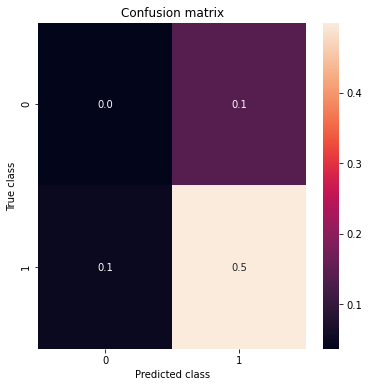

Accuracy: 0.7266266808375729


,0,1,macro avg,weighted avg
precision,0.742378,0.726435,0.734406,0.730886
recall,0.031898,0.995713,0.513805,0.726627
f1-score,0.061168,0.840022,0.450595,0.622575
support,0.580439,1.498584,2.079023,2.079023


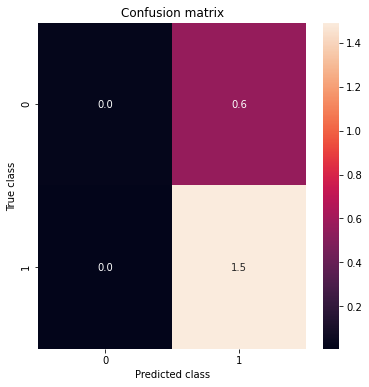

Accuracy: 0.8199950986506261


,0,1,macro avg,weighted avg
precision,0.737136,0.821917,0.779527,0.805745
recall,0.087620,0.992635,0.540127,0.819995
f1-score,0.156623,0.899245,0.527934,0.757584
support,0.399192,1.693462,2.092655,2.092655


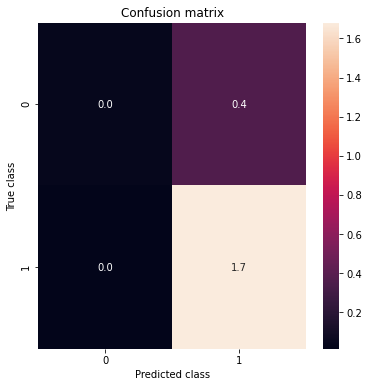

Accuracy: 0.7736157875609226


,0,1,macro avg,weighted avg
precision,0.274045,0.777751,0.525898,0.665588
recall,0.010103,0.992333,0.501218,0.773616
f1-score,0.019488,0.872035,0.445762,0.682195
support,0.636714,2.222681,2.859395,2.859395


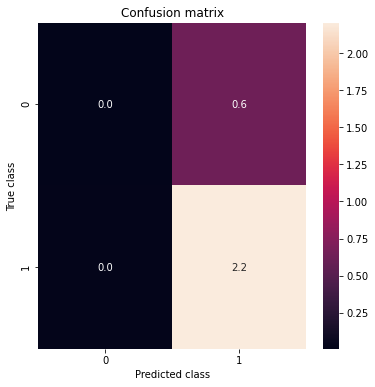

Accuracy: 0.9233841651037311


,0,1,macro avg,weighted avg
precision,0.291669,0.933446,0.612558,0.888469
recall,0.065250,0.988057,0.526654,0.923384
f1-score,0.106643,0.959976,0.533309,0.900172
support,0.164350,2.180726,2.345076,2.345076


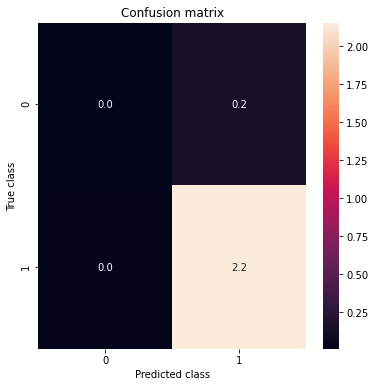

Accuracy: 0.8307275320491181


,0,1,macro avg,weighted avg
precision,0.503600,0.838114,0.670857,0.781437
recall,0.065631,0.986803,0.526217,0.830728
f1-score,0.116128,0.906401,0.511265,0.772504
support,0.454080,2.225941,2.680021,2.680021


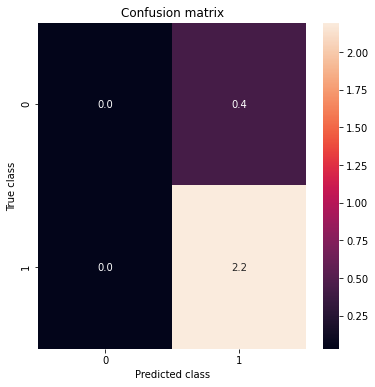

Accuracy: 0.8665836313339934


,0,1,macro avg,weighted avg
precision,0.446342,0.918920,0.682631,0.861487
recall,0.406732,0.930202,0.668467,0.866584
f1-score,0.425618,0.924526,0.675072,0.863893
support,0.324438,2.345136,2.669573,2.669573


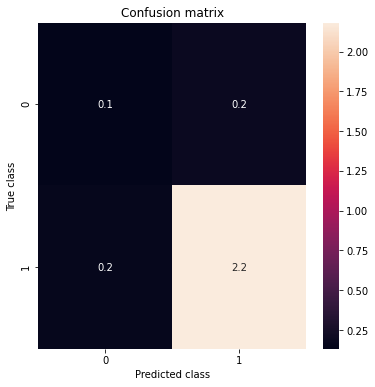

Accuracy: 0.6718120602924874


,0,1,macro avg,weighted avg
precision,0.588692,0.688617,0.638655,0.652842
recall,0.276533,0.892252,0.584392,0.671812
f1-score,0.376301,0.777319,0.576810,0.633747
support,0.599550,1.075077,1.674626,1.674626


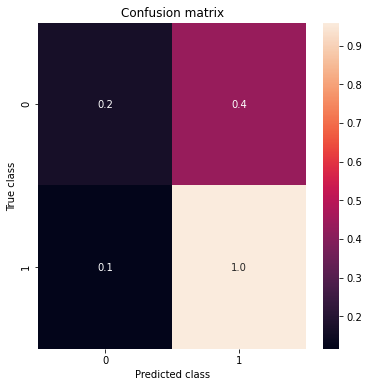

In [7]:
for mass in masses:
    display(HTML(f"<h2>Xtohh {mass} Tag 2</h2>"))
    x_test_mass = sets[mass]["x_test"]
    y_test_mass = sets[mass]["y_test"]
    w_test_mass = sets[mass]["w_test"]

    eval = model.complete_evaluation(
        x_test_mass, y_test_mass, w_test_mass, 0.4, save = False
    )

    print("Accuracy:", eval["weighted_accuracy"])
    display(pd.DataFrame(eval["weighted_class_report"]))
    plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.1f')